In [206]:
import pandas as pd
df = pd.read_csv('train.csv')

In [207]:
df.shape

(891, 12)

In [208]:
df.columns 

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [209]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [210]:
import matplotlib.pyplot as plt
plt.rc('font', family='Malgun Gothic')
plt.rc('axes', unicode_minus=False)

In [211]:
group = df.groupby('Survived').size()
group

Survived
0    549
1    342
dtype: int64

In [212]:
df.value_counts('Survived', normalize=True)

Survived
0    0.616162
1    0.383838
Name: proportion, dtype: float64

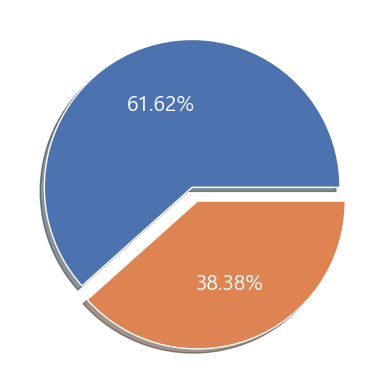

In [213]:
labels =['사망', '생존']
plt.pie(group.values, labels=labels, autopct='%.2f%%', explode=[0.05]*len(group), shadow=True, textprops={'color':'#FFFFFF','fontsize':'15'})
plt.show()

In [214]:
import seaborn as sns
sns.set_theme(font='Malgun Gothic', style='white')

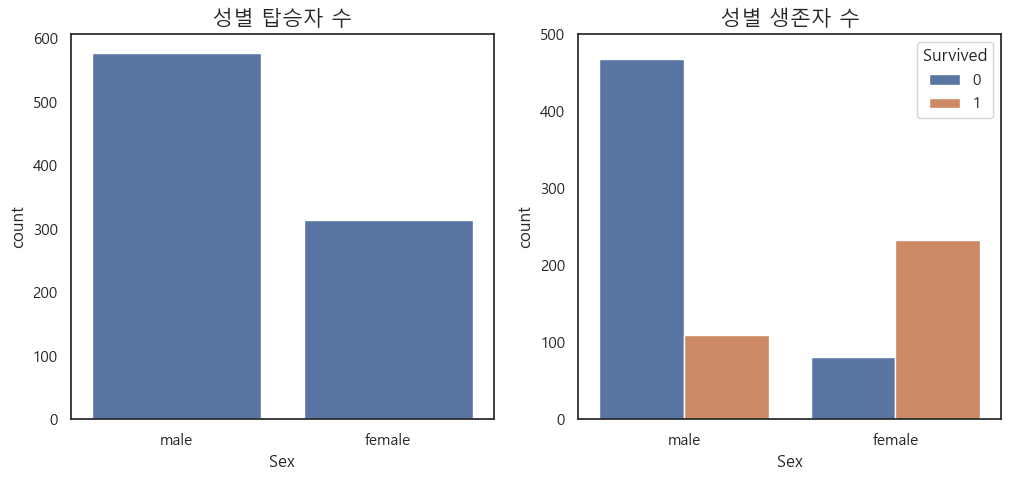

In [215]:
fig, axs = plt.subplots(1, 2, figsize=(12, 5))
axs[0].set_title('성별 탑승자 수', size=15)
sns.countplot(x='Sex', data=df, ax=axs[0])
axs[1].set_title('성별 생존자 수', size=15)
sns.countplot(x='Sex', hue='Survived', data=df, ax=axs[1])
plt.ylim(0, 500)
plt.show()

In [216]:
#성별 생존율
gender = df.groupby('Sex').size().to_frame('탑승인원')
gender

,탑승인원
Sex,
female,314
male,577


In [217]:
filt = df['Survived'] == 1
gender_survived = df[filt].groupby('Sex').size().to_frame('생존자수')
gender_survived

,생존자수
Sex,
female,233
male,109


In [218]:
join = gender_survived.join(gender)
join['생존율'] = join['생존자수']/join['탑승인원']
join

,생존자수,탑승인원,생존율
Sex,,,
female,233,314,0.742038
male,109,577,0.188908


In [219]:
#탑승 클래스별 생존율
df['Pclass'].unique()

array([3, 1, 2])

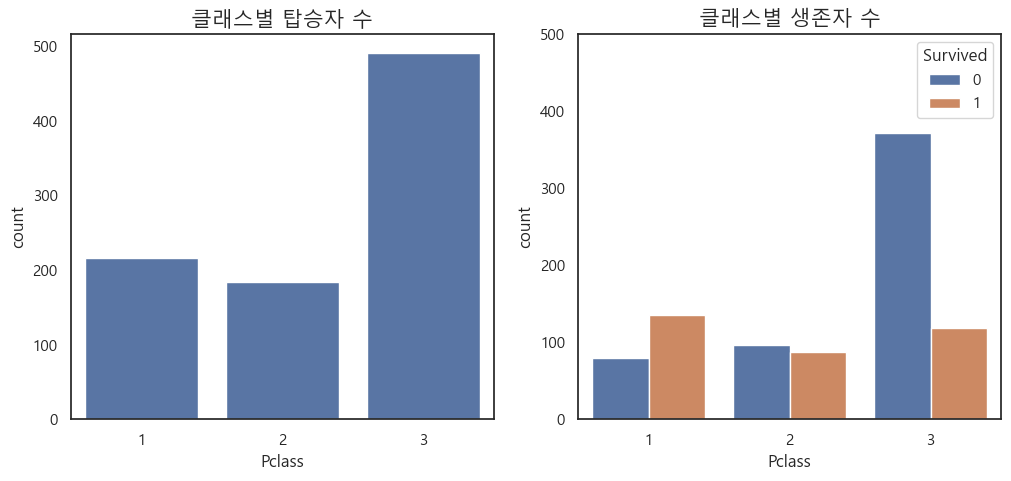

In [220]:
fig, axs = plt.subplots(1, 2, figsize=(12, 5))
axs[0].set_title('클래스별 탑승자 수', size=15)
sns.countplot(x='Pclass', data=df, ax=axs[0])
axs[1].set_title('클래스별 생존자 수', size=15)
sns.countplot(x='Pclass', hue='Survived', data=df, ax=axs[1])
plt.ylim(0, 500)
plt.show()

In [221]:
pclass = df.groupby('Pclass').size().to_frame('탑승자수')
pclass

,탑승자수
Pclass,
1,216
2,184
3,491


In [222]:
filt = df['Survived'] == 1
pclass_survived = df[filt].groupby('Pclass').size().to_frame('생존자수')
pclass_survived

,생존자수
Pclass,
1,136
2,87
3,119


In [223]:
join = pclass.join(pclass_survived)
join['생존율'] = join['생존자수']/join['탑승자수']
join

,탑승자수,생존자수,생존율
Pclass,,,
1,216,136,0.629630
2,184,87,0.472826
3,491,119,0.242363


In [224]:
df['Age'].describe()

count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: Age, dtype: float64

In [225]:
sns.set_theme(font='Malgun Gothic', style='darkgrid')

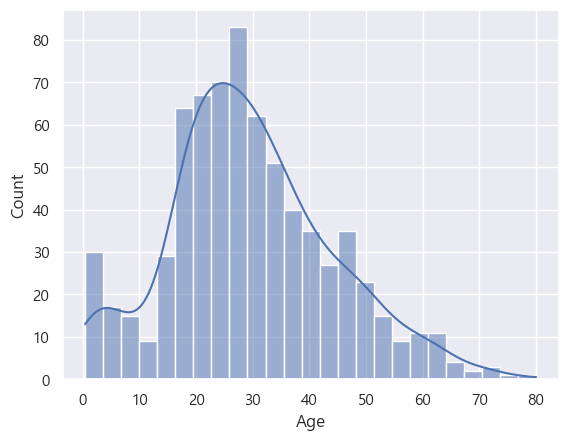

In [226]:
sns.histplot(data=df, x='Age', bins=25, kde=True)
plt.show()

In [227]:
#연령대별 사망자, 생존자 그래프
survived = df[df['Survived']==1]
dead = df[df['Survived']==0]

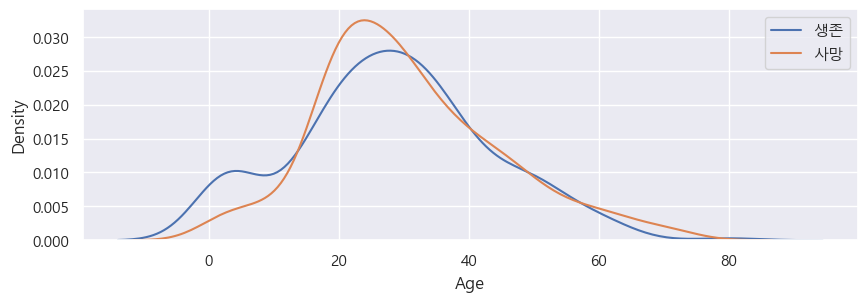

In [228]:
plt.figure(figsize=(10, 3))
sns.kdeplot(survived['Age'], label='생존')
sns.kdeplot(dead['Age'], label='사망')
plt.legend()
plt.show()

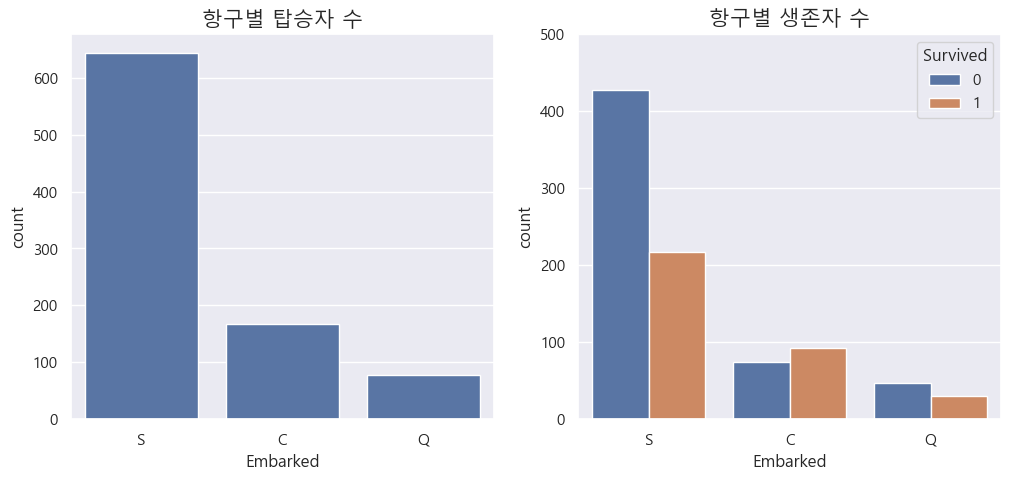

In [229]:
#탑승항구별 생존율
fig, axs = plt.subplots(1, 2, figsize=(12, 5))
axs[0].set_title('항구별 탑승자 수', size=15)
sns.countplot(x='Embarked', data=df, ax=axs[0])
axs[1].set_title('항구별 생존자 수', size=15)
sns.countplot(x='Embarked', hue='Survived', data=df, ax=axs[1])
plt.ylim(0, 500)
plt.show()

In [230]:
embarked = df.groupby('Embarked').size().to_frame('탑승자수')
embarked

,탑승자수
Embarked,
C,168
Q,77
S,644


In [231]:
embarked_survived = df[df['Survived']==1].groupby('Embarked').size().to_frame('생존자수')
join = embarked.join(embarked_survived)
join['생존율'] = join['생존자수']/join['탑승자수']
join

,탑승자수,생존자수,생존율
Embarked,,,
C,168,93,0.553571
Q,77,30,0.389610
S,644,217,0.336957


In [232]:
c1 = df[df['Pclass']==1].value_counts('Embarked')
c2 = df[df['Pclass']==2].value_counts('Embarked')
c3 = df[df['Pclass']==3].value_counts('Embarked')
pclass = pd.DataFrame([c1, c2, c3])
pclass.index=['1등급', '2등급', '3등급']
pclass.columns=['S항구', 'C항구', 'Q항구']
pclass

,S항구,C항구,Q항구
1등급,127,85,2
2등급,164,17,3
3등급,353,66,72


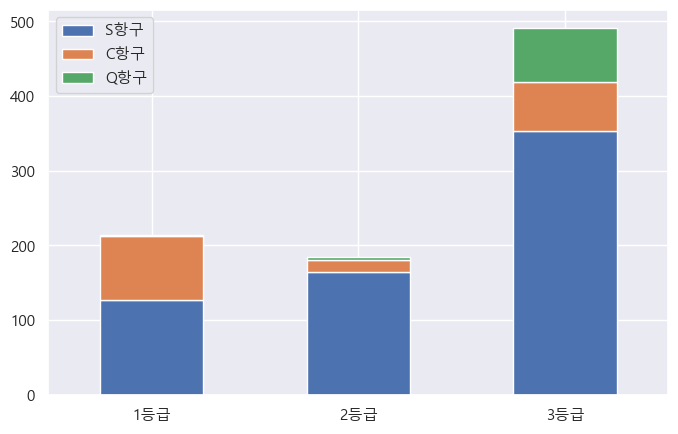

In [233]:
fig, ax = plt.subplots(figsize=(8, 5))
pclass.plot(kind='bar', stacked=True, ax = ax)
plt.xticks(rotation=0)
plt.show()

In [234]:
#항구별로 1등급 2등급 3등급.....
c1 = df[df['Embarked']=='S'].value_counts('Pclass')
c2 = df[df['Embarked']=='C'].value_counts('Pclass')
c3 = df[df['Embarked']=='Q'].value_counts('Pclass')
pclass = pd.DataFrame([c1, c2, c3])
pclass.index=['S항구', 'C항구', 'Q항구']
pclass.columns=['1등급', '2등급', '3등급']
pclass

,1등급,2등급,3등급
S항구,353,164,127
C항구,66,17,85
Q항구,72,3,2


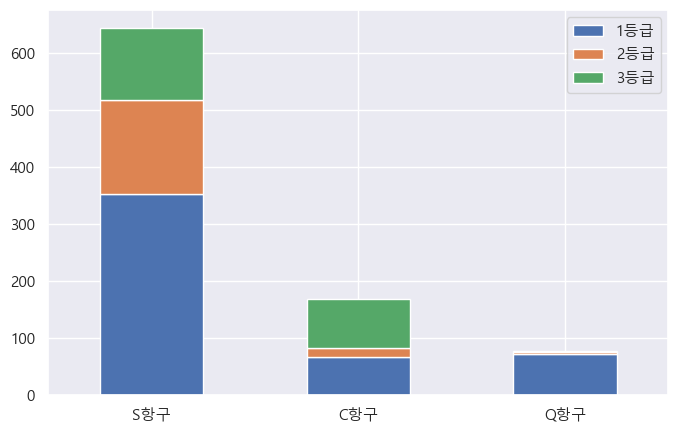

In [235]:
fig, ax = plt.subplots(figsize=(8, 5))
pclass.plot(kind='bar', stacked=True, ax = ax)
plt.xticks(rotation=0)
plt.show()